En seguida se muestran ejemplos de aplicacion de SkLearn y StatModels para aplicar en desarrollos de analis de datos

El siguiente ejemplo muestra una aplicacion de regresion lineal para un conjunto de datos. EStos datos estan nivelados apartir de una ecuacion cuadratica

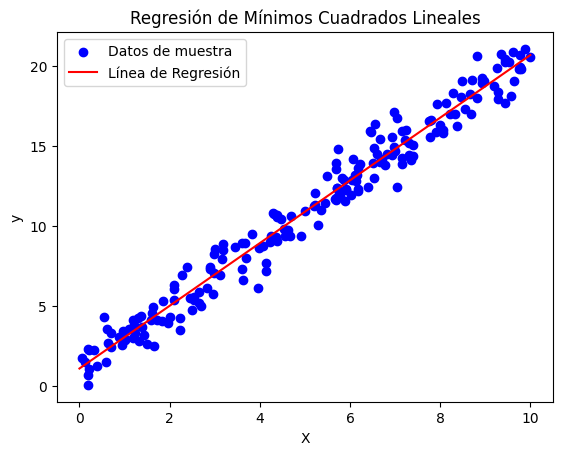

Coeficiente de la pendiente (w_1): 1.9561955978325256
Ordenada al origen (w_0): 1.1069418955427626


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos de muestra
np.random.seed(0)
X = np.random.rand(200, 1) * 10
y = 2 * X + 1 + np.random.randn(200, 1)

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Hacer predicciones con el modelo ajustado
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = modelo.predict(X_pred)

# Graficar los datos y la línea de regresión ajustada
plt.scatter(X, y, label='Datos de muestra', color='blue')
plt.plot(X_pred, y_pred, label='Línea de Regresión', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regresión de Mínimos Cuadrados Lineales')
plt.show()

# Imprimir los coeficientes del modelo
print(f"Coeficiente de la pendiente (w_1): {modelo.coef_[0][0]}")
print(f"Ordenada al origen (w_0): {modelo.intercept_[0]}")

Con el uso de statModels vemos el siguiente ejemplo de a aprto de una semilla podemos modelar el ruido dipobible en una funcion

y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)


In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Crear datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 1)  # Variable independiente
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Variable dependiente con ruido

# Agregar una constante (intercepto) al conjunto de datos
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3262.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           4.88e-77
Time:                        21:04:40   Log-Likelihood:                 88.744
No. Observations:                 100   AIC:                            -173.5
Df Residuals:                      98   BIC:                            -168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0222      0.019     52.884      0.0

Aqui aparece la presentacion de p>t, su indicador nos ayuda a revisar el coeficiente asociado a la variable independiente. PAra el ejemplo Y no tiene correlacion con la variable x.


un ejemplo para 3 variables independientes y su valuacion en stm seria el siguiente

In [3]:
import numpy as np
import statsmodels.api as sm

# Datos de ejemplo
X1 = np.random.rand(100)  # Variable independiente 1
X2 = np.random.rand(100)  # Variable independiente 2
X3 = np.random.rand(100)  # Variable independiente 3
y = 2 * X1 + 3 * X2 + 4 * X3 + np.random.randn(100)  # Variable dependiente

# Agregar una constante para el intercepto. Estamos buscando nuestro centro enel conjunto de vairables
X = sm.add_constant(np.column_stack((X1, X2, X3)))

# Crear un modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo a los datos, este es el recentrado de los datos
resultado = modelo.fit()

# Imprimir un resumen de los resultados
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     71.41
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.33e-24
Time:                        21:16:53   Log-Likelihood:                -145.31
No. Observations:                 100   AIC:                             298.6
Df Residuals:                      96   BIC:                             309.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1314      0.326      0.403      0.6

Aqui aprecionamos el valor de R-squared en Stm (No es otra cosa, que el indicador de varianza total en la variable dependiente en relacion al conjunto de variables independientes definidas)

A nuestro ejemplo R-squared = 0.682, como nos encontramos no tan cerca a 1. Desafortunamente nuestro modelo no se aproxima a la realidad. Tenemos una variabilidad del 68%.

Por suesto el valor Adj. R-squared, nos indica en cuanto debemos ajustar nuestro modelo para aproximarnos a la realidad

In [4]:
import statsmodels.api as sm
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)
X1 = np.random.randn(100)
X2 = np.random.randn(100)
y = np.random.choice([0, 1], 100)

# necesario para calcular el intercepto
X = sm.add_constant(np.column_stack((X1, X2)))

# Crear un modelo de regresión logística
logit_model = sm.Logit(y, X)

# Ajustar el modelo a los datos
result = logit_model.fit()

# Imprimir un resumen de los resultados
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.664705
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Sep 2023   Pseudo R-squ.:                 0.04103
Time:                        21:30:41   Log-Likelihood:                -66.470
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                   0.05818
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0057      0.207     -0.028      0.978      -0.411       0.399
x1            -0.3845      0.

El anterior ejemplo de regresion logistica de STM nos permite obtener el valor las conastantes luego de dsu centrado y su valcion de ajsute .fit



In [6]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carga el conjunto de datos Titanic
titanic_data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Elimina las filas con valores faltantes
titanic_data = titanic_data.dropna()

# Divide el conjunto de datos en características (X) y etiquetas (y)
#aqui nuestras variables categoricas
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']

# Codifica las variables categóricas en variables numéricas, nustra tranformacion para analisis
X = pd.get_dummies(X, columns=['Pclass', 'Sex'], drop_first=True)

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evalúa la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Muestra un informe de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.7453183520599251
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       166
           1       0.66      0.68      0.67       101

    accuracy                           0.75       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.75      0.75      0.75       267



nuestro ejemplo anterior, usa la bd de titic. Algo muy similar a lo que explico el Mister en la clase. Por su puesto en el conjunto de variables.

Revisamos con SkLean las variables categoricas. Realizamos la transformacion a 1 y 0's y llegamos aun entrenamiento de X_train, X_test, y_train, y_test variables.

Este fue   un ejemplo de aprendizaje supervisado para variables categoricas